# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

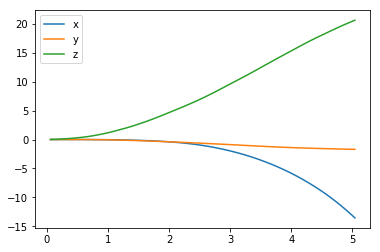

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

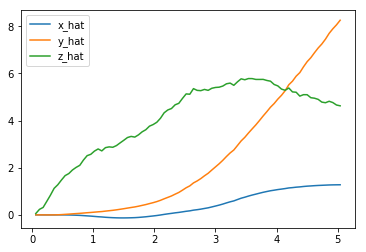

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

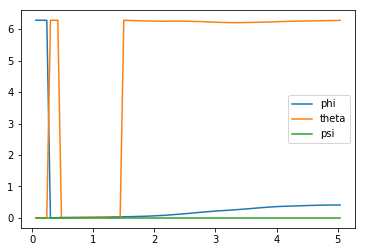

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

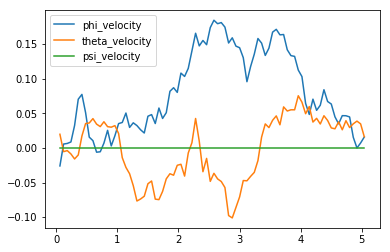

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

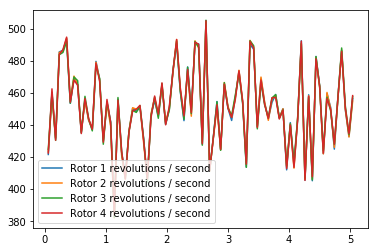

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  2.03347581  11.65723943  20.29654996   0.41147363   6.27785861   0.        ]
[ 1.27642778  8.25373928  4.62492538]
[ 0.01580767  0.01620361  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  61.318 (best =  82.936), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [4]:
my_labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4', 'episode', 'total_reward']
my_linear_results = {x : [] for x in my_labels}

In [41]:
# DEFAULT LINEAR AGENT FOR COMPARE
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task


num_episodes = 1000
target_pos = np.array([10., 10., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task)

linear_rewards_list = []

task.reset()

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            linear_rewards_list.append((i_episode, agent.total_reward))
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action) + [i_episode] + [agent.total_reward]
            for i in range(len(my_labels)):
                my_linear_results[my_labels[i]].append(to_write[i])
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}, total_reward = {:7.3f}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale, agent.total_reward), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  20.275 (best =  40.208), noise_scale = 3.2, total_reward = 466.3203726

In [50]:
## DDPG Agent
import sys
import pandas as pd
from agents.ddpg_agent import DDPG_Agent
from task import Task


num_episodes = 1000
target_pos = np.array([10., 10., 10.])
task = Task(target_pos=target_pos)
agent = DDPG_Agent(task) 

ddpg_results = {x : [] for x in my_labels}
ddpg_rewards_list = []

task.reset()

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode

    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state

        if done:
            # For mapping results
            ddpg_rewards_list.append((i_episode, agent.total_reward))
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) \
                + list(task.sim.angular_v) + list(action) + [i_episode] + [agent.total_reward]
            for ii in range(len(my_labels)):
                ddpg_results[my_labels[ii]].append(to_write[ii])

            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), total_reward = {:7.3f}".format(
                i_episode, agent.score, agent.best_score, agent.total_reward), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  17.701 (best =  45.062), total_reward = 1097.492

In [54]:
# Q Agent
import sys
import pandas as pd
from agents.q_agent import q_agent, Memory
from task import Task
import tensorflow as tf

train_episodes = 1000          # max number of episodes to learn from
max_steps = 200                # max steps in an episode
gamma = 0.99                   # future reward discount

# Exploration parameters
explore_start = 1.0            # exploration probability at start
explore_stop = 0.01            # minimum exploration probability 
decay_rate = 0.0001            # exponential decay rate for exploration prob

# Network parameters
hidden_size = 64               # number of units in each Q-network hidden layer
learning_rate = 0.01         # Q-network learning rate

# Memory parameters
memory_size = 10000            # memory capacity
batch_size = 1                # experience mini-batch size
pretrain_length = batch_size   # number experiences to pretrain the memory


tf.reset_default_graph()
agent = q_agent(task, name='main', hidden_size=hidden_size, learning_rate=learning_rate)
task.reset()
memory = Memory(max_size=memory_size)

q_rewards_list = []
q_results = {x : [] for x in my_labels}
loss = 0

# Make a bunch of random actions and store the experiences
state, reward, done = task.step(agent.sample())
for ii in range(pretrain_length):
    # Make a random action
    action = agent.sample()
    next_state, reward, done = task.step(action)

    if done:
        # The simulation fails so no next state
        next_state = np.zeros(state.shape)
        # Add experience to memory
        memory.add((state, action, reward, next_state))
        
        # Start new episode
        task.reset()
        # Take one random step to get the pole and cart moving
        state, reward, done = task.step(agent.sample())
    else:
        # Add experience to memory
        memory.add((state, action, reward, next_state))
        state = next_state

        

with tf.Session(graph=agent.graph) as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    
    step = 0
    for ep in range(1, train_episodes):
        total_reward = 0
        t = 0
        while t < max_steps:
            step += 1
            # Uncomment this next line to watch the training
            # env.render() 
            
            # Explore or Exploit
            explore_p = explore_stop + (explore_start - explore_stop)*np.exp(-decay_rate*step) 
            if explore_p > np.random.rand():
                # Make a random action
                action = agent.sample()
            else:
                # Get action from Q-network
                feed = {agent.inputs_: state.reshape((1, *state.shape))}
                Qs = sess.run(agent.output, feed_dict=feed)
                Qs = np.squeeze(Qs)
                action = (np.argmax(Qs[:agent.rotor_action_space_size]), \
                          np.argmax(Qs[agent.rotor_action_space_size:(agent.rotor_action_space_size*2)]), \
                          np.argmax(Qs[agent.rotor_action_space_size * 2:(agent.rotor_action_space_size*3)]), \
                          np.argmax(Qs[agent.rotor_action_space_size*3:]),
                         )
                

            # Take action, get new state and reward
            next_state, reward, done = task.step(action)
    
            total_reward += reward
            
            if done:
                # the episode ends so no next state
                next_state = np.zeros(state.shape)
                t = max_steps
                
                print('Episode: {}'.format(ep),
                      'Total reward: {}'.format(total_reward),
                      'Training loss: {:.4f}'.format(loss),
                      'Explore P: {:.4f}'.format(explore_p))
                
                q_rewards_list.append((ep, total_reward))
                to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) \
                    + list(task.sim.angular_v) + list(action) + [i_episode] + [total_reward]
                for ii in range(len(my_labels)):
                    q_results[my_labels[ii]].append(to_write[ii])
                
                # Add experience to memory
                memory.add((state, action, reward, next_state))
                
                # Start new episode
                task.reset()
                # Take one random step to get the pole and cart moving
                state, reward, done = task.step(agent.sample())

            else:
                # Add experience to memory
                memory.add((state, action, reward, next_state))
                state = next_state
                t += 1
            
            # Sample mini-batch from memory
            batch = memory.sample(batch_size)
            states = np.array([each[0] for each in batch])
            actions = np.array([each[1] for each in batch])
            rewards = np.array([each[2] for each in batch])
            next_states = np.array([each[3] for each in batch])
            
            # Train network
            target_Qs = sess.run(agent.output, feed_dict={agent.inputs_: next_states})
            
            # Set target_Qs to 0 for states where episode ends
            episode_ends = (next_states == np.zeros(states[0].shape)).all(axis=1)
            target_Qs[episode_ends] = np.zeros((agent.rotor_action_space_size * agent.action_size))
            
            targets = rewards + gamma * np.max(target_Qs, axis=1)

            loss, _ = sess.run([agent.loss, agent.opt],
                                feed_dict={agent.inputs_: states,
                                           agent.targetQs_: targets,
                                           agent.actions_: actions})
        

    sys.stdout.flush()

Episode: 1 Total reward: 445.3178904263598 Training loss: 9018.5742 Explore P: 0.9977
Episode: 2 Total reward: 563.8466568946154 Training loss: 221272.9375 Explore P: 0.9954
Episode: 3 Total reward: 535.4339395149689 Training loss: 6804681.0000 Explore P: 0.9930
Episode: 4 Total reward: 518.5969468140803 Training loss: 234659792.0000 Explore P: 0.9906


/home/workspace/physics_sim.py:114: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Episode: 5 Total reward: 551.1377824726917 Training loss: 1282262656.0000 Explore P: 0.9882
Episode: 6 Total reward: 515.3449699884269 Training loss: 1899831680.0000 Explore P: 0.9858
Episode: 7 Total reward: 494.2266488070943 Training loss: 18855219200.0000 Explore P: 0.9834
Episode: 8 Total reward: 601.5198199175044 Training loss: 65140584448.0000 Explore P: 0.9809
Episode: 9 Total reward: 470.8344580007314 Training loss: 146375917568.0000 Explore P: 0.9786
Episode: 10 Total reward: 573.1636617710111 Training loss: 272775364608.0000 Explore P: 0.9762
Episode: 11 Total reward: 580.942932979345 Training loss: 73442976.0000 Explore P: 0.9737
Episode: 12 Total reward: 528.0795366589268 Training loss: 1377890861056.0000 Explore P: 0.9713
Episode: 13 Total reward: 534.4429413609297 Training loss: 1050702053376.0000 Explore P: 0.9689
Episode: 14 Total reward: 589.7404538508671 Training loss: 4373086994432.0000 Explore P: 0.9664
Episode: 15 Total reward: 544.8601359540223 Training loss: 9517

Episode: 89 Total reward: 513.7442326730394 Training loss: 169751366829342720.0000 Explore P: 0.8028
Episode: 90 Total reward: 619.6451787735516 Training loss: 112964829660053504.0000 Explore P: 0.8007
Episode: 91 Total reward: 531.1356116991593 Training loss: 128556119290281984.0000 Explore P: 0.7986
Episode: 92 Total reward: 525.7853067103996 Training loss: 117615136780320768.0000 Explore P: 0.7967
Episode: 93 Total reward: 515.6479812939276 Training loss: 124592293972803584.0000 Explore P: 0.7948
Episode: 94 Total reward: 509.6120951285199 Training loss: 225404539438628864.0000 Explore P: 0.7928
Episode: 95 Total reward: 532.5719705193846 Training loss: 151721682665472.0000 Explore P: 0.7908
Episode: 96 Total reward: 519.7245375356109 Training loss: 135713287152074752.0000 Explore P: 0.7889
Episode: 97 Total reward: 582.4528260905565 Training loss: 208266084745216.0000 Explore P: 0.7870
Episode: 98 Total reward: 554.8552629322832 Training loss: 302255368518500352.0000 Explore P: 0.7

Episode: 170 Total reward: 567.7520315452246 Training loss: 1079817038060322816.0000 Explore P: 0.6576
Episode: 171 Total reward: 522.0541395475822 Training loss: 2491154424081154048.0000 Explore P: 0.6561
Episode: 172 Total reward: 536.6429935820075 Training loss: 2371638609653530624.0000 Explore P: 0.6546
Episode: 173 Total reward: 563.8928098682393 Training loss: 1248930722505293824.0000 Explore P: 0.6530
Episode: 174 Total reward: 507.36679550742156 Training loss: 1445040028752281600.0000 Explore P: 0.6514
Episode: 175 Total reward: 537.2961091180541 Training loss: 1452073329757257728.0000 Explore P: 0.6498
Episode: 176 Total reward: 471.0807585350708 Training loss: 1484210130491801600.0000 Explore P: 0.6482
Episode: 177 Total reward: 572.9528885398028 Training loss: 2059466367806996480.0000 Explore P: 0.6464
Episode: 178 Total reward: 580.3919038133644 Training loss: 2609949083435008.0000 Explore P: 0.6449
Episode: 179 Total reward: 517.3269090263882 Training loss: 106586141800529

Episode: 250 Total reward: 566.4509341416149 Training loss: 7457232530702336.0000 Explore P: 0.5400
Episode: 251 Total reward: 636.8830844873202 Training loss: 10222213479503233024.0000 Explore P: 0.5386
Episode: 252 Total reward: 583.8962634880871 Training loss: 5646559556629692416.0000 Explore P: 0.5373
Episode: 253 Total reward: 619.4760055410801 Training loss: 7787932668758327296.0000 Explore P: 0.5358
Episode: 254 Total reward: 555.7845711796515 Training loss: 9569323474929844224.0000 Explore P: 0.5346
Episode: 255 Total reward: 499.12249294248426 Training loss: 6341840132500357120.0000 Explore P: 0.5332
Episode: 256 Total reward: 506.14447710414254 Training loss: 6158265671126876160.0000 Explore P: 0.5319
Episode: 257 Total reward: 546.4161842478054 Training loss: 11654505495565172736.0000 Explore P: 0.5306
Episode: 258 Total reward: 560.7233582709152 Training loss: 6899145742980481024.0000 Explore P: 0.5294
Episode: 259 Total reward: 594.616621190918 Training loss: 7553937352914

Episode: 331 Total reward: 602.2777056703454 Training loss: 19029362091128520704.0000 Explore P: 0.4431
Episode: 332 Total reward: 586.0997020667536 Training loss: 16767470959723544576.0000 Explore P: 0.4420
Episode: 333 Total reward: 628.5801764645755 Training loss: 14073683964346761216.0000 Explore P: 0.4409
Episode: 334 Total reward: 543.8261942464925 Training loss: 15337141571917185024.0000 Explore P: 0.4398
Episode: 335 Total reward: 592.3984042650386 Training loss: 14450254602232135680.0000 Explore P: 0.4388
Episode: 336 Total reward: 489.2716130591146 Training loss: 13176739761802444800.0000 Explore P: 0.4377
Episode: 337 Total reward: 566.68078607153 Training loss: 12487496604279898112.0000 Explore P: 0.4367
Episode: 338 Total reward: 504.0472223111003 Training loss: 17760293675721555968.0000 Explore P: 0.4356
Episode: 339 Total reward: 543.4313027783683 Training loss: 23029622887489208320.0000 Explore P: 0.4345
Episode: 340 Total reward: 565.2898336891303 Training loss: 112310

Episode: 411 Total reward: 534.2396349285306 Training loss: 26557498304185237504.0000 Explore P: 0.3650
Episode: 412 Total reward: 594.0472145977932 Training loss: 28783697089129349120.0000 Explore P: 0.3641
Episode: 413 Total reward: 550.6948537962944 Training loss: 13967700939033804800.0000 Explore P: 0.3633
Episode: 414 Total reward: 565.9559211671954 Training loss: 26957362095905046528.0000 Explore P: 0.3624
Episode: 415 Total reward: 594.4952918848111 Training loss: 26354557045000110080.0000 Explore P: 0.3615
Episode: 416 Total reward: 548.2810035477416 Training loss: 38815953442259861504.0000 Explore P: 0.3606
Episode: 417 Total reward: 586.6040814687186 Training loss: 48496923870494720.0000 Explore P: 0.3597
Episode: 418 Total reward: 553.0609561660744 Training loss: 40599563612652044288.0000 Explore P: 0.3588
Episode: 419 Total reward: 577.8925686545927 Training loss: 48639236615415267328.0000 Explore P: 0.3580
Episode: 420 Total reward: 562.873416565145 Training loss: 41576413

Episode: 492 Total reward: 618.4654953915184 Training loss: 30277381436439789568.0000 Explore P: 0.2997
Episode: 493 Total reward: 556.5380925158545 Training loss: 35298475007516082176.0000 Explore P: 0.2990
Episode: 494 Total reward: 550.4511447057787 Training loss: 56179243156005453824.0000 Explore P: 0.2982
Episode: 495 Total reward: 578.2291365550226 Training loss: 53966418830501609472.0000 Explore P: 0.2975
Episode: 496 Total reward: 596.35270659414 Training loss: 35661960357519294464.0000 Explore P: 0.2967
Episode: 497 Total reward: 607.2544046526269 Training loss: 28625939160776048640.0000 Explore P: 0.2960
Episode: 498 Total reward: 575.5232315368397 Training loss: 34103158533565448192.0000 Explore P: 0.2953
Episode: 499 Total reward: 586.2989176752912 Training loss: 31801166014072225792.0000 Explore P: 0.2946
Episode: 500 Total reward: 546.5582006467564 Training loss: 33873239657081208832.0000 Explore P: 0.2940
Episode: 501 Total reward: 601.8311634191117 Training loss: 310030

Episode: 573 Total reward: 611.1474869758522 Training loss: 37462758093676871680.0000 Explore P: 0.2462
Episode: 574 Total reward: 510.0185825780409 Training loss: 39534963678081187840.0000 Explore P: 0.2456
Episode: 575 Total reward: 591.9756613211057 Training loss: 37961188704780288.0000 Explore P: 0.2450
Episode: 576 Total reward: 556.8563218600289 Training loss: 41897466720497434624.0000 Explore P: 0.2444
Episode: 577 Total reward: 538.0694533956283 Training loss: 32959184854585442304.0000 Explore P: 0.2438
Episode: 578 Total reward: 600.2681794287082 Training loss: 54367322760221294592.0000 Explore P: 0.2432
Episode: 579 Total reward: 601.0660362128887 Training loss: 103313350951174144.0000 Explore P: 0.2426
Episode: 580 Total reward: 537.1590126570587 Training loss: 59033526963200327680.0000 Explore P: 0.2420
Episode: 581 Total reward: 615.5453735312817 Training loss: 34397669320135016448.0000 Explore P: 0.2415
Episode: 582 Total reward: 587.2200974128265 Training loss: 335333014

Episode: 654 Total reward: 589.9697310461063 Training loss: 17543026879538135040.0000 Explore P: 0.2025
Episode: 655 Total reward: 606.5374875949271 Training loss: 62857663588977344512.0000 Explore P: 0.2020
Episode: 656 Total reward: 566.4144913550952 Training loss: 26676652379287322624.0000 Explore P: 0.2015
Episode: 657 Total reward: 572.7890437402914 Training loss: 68647678626706227200.0000 Explore P: 0.2010
Episode: 658 Total reward: 599.5906628459136 Training loss: 63204849778610405376.0000 Explore P: 0.2005
Episode: 659 Total reward: 589.7203126797657 Training loss: 69658327724725370880.0000 Explore P: 0.2001
Episode: 660 Total reward: 587.4662979446517 Training loss: 71227273642957078528.0000 Explore P: 0.1996
Episode: 661 Total reward: 566.5926365973932 Training loss: 76124634772513226752.0000 Explore P: 0.1991
Episode: 662 Total reward: 603.4305599618914 Training loss: 67505237666935341056.0000 Explore P: 0.1986
Episode: 663 Total reward: 603.3525367540574 Training loss: 7056

Episode: 735 Total reward: 613.4016545397477 Training loss: 68084794643982581760.0000 Explore P: 0.1668
Episode: 736 Total reward: 594.519232410086 Training loss: 84615001989548343296.0000 Explore P: 0.1664
Episode: 737 Total reward: 599.5463766890443 Training loss: 51020105900061884416.0000 Explore P: 0.1660
Episode: 738 Total reward: 544.9175745438306 Training loss: 59564314002485936128.0000 Explore P: 0.1657
Episode: 739 Total reward: 541.465890739805 Training loss: 60193744826969096192.0000 Explore P: 0.1653
Episode: 740 Total reward: 557.6002349572054 Training loss: 73093852960781238272.0000 Explore P: 0.1649
Episode: 741 Total reward: 587.8119630437111 Training loss: 53663164727467966464.0000 Explore P: 0.1645
Episode: 742 Total reward: 538.2838185098292 Training loss: 59650555296522174464.0000 Explore P: 0.1641
Episode: 743 Total reward: 575.1564330126738 Training loss: 41675510507221549056.0000 Explore P: 0.1637
Episode: 744 Total reward: 557.3405711764503 Training loss: 842401

Episode: 816 Total reward: 564.0832044672459 Training loss: 79379628995381297152.0000 Explore P: 0.1377
Episode: 817 Total reward: 577.570061057628 Training loss: 36651342701633994752.0000 Explore P: 0.1374
Episode: 818 Total reward: 605.8237020416998 Training loss: 67407820936714387456.0000 Explore P: 0.1371
Episode: 819 Total reward: 591.7700757989711 Training loss: 107268196076152160256.0000 Explore P: 0.1368
Episode: 820 Total reward: 583.875619334552 Training loss: 93826112272730161152.0000 Explore P: 0.1365
Episode: 821 Total reward: 569.7894067422518 Training loss: 40745737086495096832.0000 Explore P: 0.1361
Episode: 822 Total reward: 520.7205947322257 Training loss: 56771954690167406592.0000 Explore P: 0.1358
Episode: 823 Total reward: 601.2657915246727 Training loss: 38435034235886632960.0000 Explore P: 0.1355
Episode: 824 Total reward: 600.3084600328119 Training loss: 88179513133681868800.0000 Explore P: 0.1352
Episode: 825 Total reward: 551.6602179329202 Training loss: 10548

Episode: 895 Total reward: 568.2785231052942 Training loss: 76855704451868000256.0000 Explore P: 0.1148
Episode: 896 Total reward: 580.7518219185334 Training loss: 78878726682138640384.0000 Explore P: 0.1145
Episode: 897 Total reward: 618.7505684099834 Training loss: 93512505168209379328.0000 Explore P: 0.1142
Episode: 898 Total reward: 603.3890745824871 Training loss: 75030057752922685440.0000 Explore P: 0.1140
Episode: 899 Total reward: 611.5626778487502 Training loss: 90365597336398200832.0000 Explore P: 0.1137
Episode: 900 Total reward: 565.4150900747286 Training loss: 34043048232874934272.0000 Explore P: 0.1134
Episode: 901 Total reward: 543.5370370644516 Training loss: 61683956916559020032.0000 Explore P: 0.1132
Episode: 902 Total reward: 618.1041195525366 Training loss: 77453618875052589056.0000 Explore P: 0.1129
Episode: 903 Total reward: 601.1456560414438 Training loss: 89453178607204564992.0000 Explore P: 0.1127
Episode: 904 Total reward: 596.2404880694748 Training loss: 8131

Episode: 976 Total reward: 560.9894000443821 Training loss: 71598020167750123520.0000 Explore P: 0.0955
Episode: 977 Total reward: 519.27147205607 Training loss: 73186462626165555200.0000 Explore P: 0.0953
Episode: 978 Total reward: 534.5419351278214 Training loss: 87238964499003211776.0000 Explore P: 0.0951
Episode: 979 Total reward: 588.0378292580484 Training loss: 63311040611621011456.0000 Explore P: 0.0949
Episode: 980 Total reward: 610.1950453213266 Training loss: 76940067780043997184.0000 Explore P: 0.0946
Episode: 981 Total reward: 588.1913496561896 Training loss: 73801876876417826816.0000 Explore P: 0.0944
Episode: 982 Total reward: 571.5399235221538 Training loss: 42709566008772788224.0000 Explore P: 0.0942
Episode: 983 Total reward: 503.78090282107274 Training loss: 95054609808583819264.0000 Explore P: 0.0940
Episode: 984 Total reward: 594.6777806984818 Training loss: 87667360617463808000.0000 Explore P: 0.0938
Episode: 985 Total reward: 586.389369482378 Training loss: 115443

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [9]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

Text(0,0.5,'Total Reward')

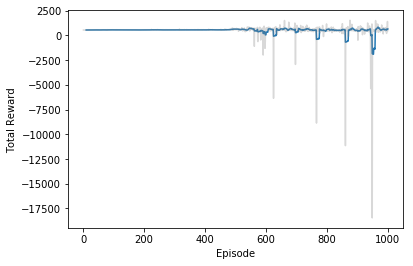

In [56]:
## TODO: Plot the rewards.
eps, rews = np.array(linear_rewards_list).T
smoothed_rews = running_mean(rews, 10)
plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.plot(eps, rews, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total Reward')

In [64]:
eps, rews = np.array(linear_rewards_list).T
avg_last_10 = np.sum(rews[len(rews)-10:]) / 10
print(avg_last_10)

640.558139705


Text(0,0.5,'Total Reward')

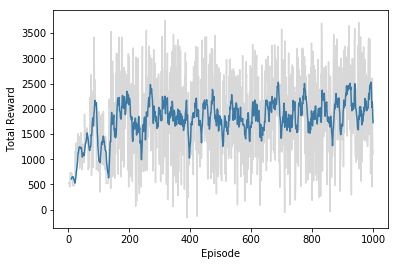

In [51]:
# ddpg agent rewards
eps, rews = np.array(ddpg_rewards_list).T
smoothed_rews = running_mean(rews, 10)
plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.plot(eps, rews, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total Reward')

In [62]:
eps, rews = np.array(ddpg_rewards_list).T
avg_last_10 = np.sum(rews[len(rews)-10:]) / 10
print(avg_last_10)

1725.5641126


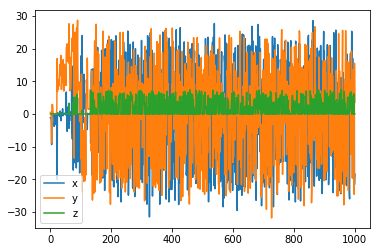

In [52]:
# Plot position
plt.plot(ddpg_results['episode'], ddpg_results['x'], label='x')
plt.plot(ddpg_results['episode'], ddpg_results['y'], label='y')
plt.plot(ddpg_results['episode'], ddpg_results['z'], label='z')
plt.legend()
_ = plt.ylim()

In [68]:
# Position of agent at the end of training
print(ddpg_results['x'][-1], ddpg_results['y'][-1], ddpg_results['z'][-1])

-18.440114818 3.5717350697 0.0


Text(0,0.5,'Total Reward')

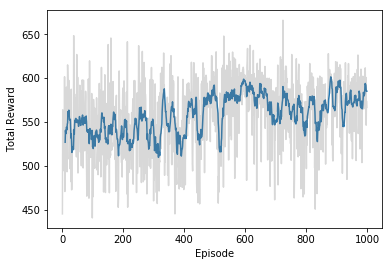

In [55]:
# q agent rewards
eps, rews = np.array(q_rewards_list).T
smoothed_rews = running_mean(rews, 10)
plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.plot(eps, rews, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total Reward')

In [63]:
eps, rews = np.array(q_rewards_list).T
avg_last_10 = np.sum(rews[len(rews)-10:]) / 10
print(avg_last_10)

585.080093334


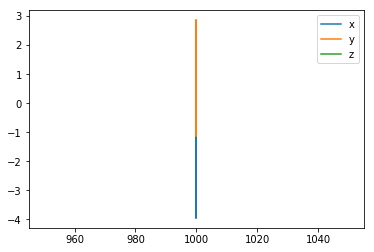

In [58]:
# Plot position
plt.plot(q_results['episode'], q_results['x'], label='x')
plt.plot(q_results['episode'], q_results['y'], label='y')
plt.plot(q_results['episode'], q_results['z'], label='z')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
First, I adjusted the stage to accommodate the agent velocities and angular velocities on top of the position.
I set the target to be a position of coordinates (10.0, 10.0, 10.0).  I suppose since the agent starts at initial position (0, 0, 0) this means take off, travel, and hover.
I modified the reward function only a bit by giving an bonus points for every additional axis the agent was close enough to.  I defined close enough as a delta of 0.1.  I also increased the signal for loss by removing that 0.3 modifier.  This seemed to help provide a stronger signal.  If anything, at least it made the graph easier to read.




**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- I used the linear agent, the suggest DDPG agent, and the not recommended Deep Q Network agent.  I spent the most time with the DDPG since it was recommended and ultimately got the best results there but I felt the Deep Q Network had potential because it seemed to learn more gradually.
- The hyperparameters I ended up with for the DDPG agent were:
  self.exploration_mu = 0.1
  self.exploration_theta = 0.2
  self.exploration_sigma = 0.5
  self.gamma = 0.8  
  self.tau = 0.2  
- I left the neural network architecture alone for the actor and critic in the DDPG agent.  Two to three layers seemed to be the recommended number or layers for each.  Relu activations for the hidden layers and sigmoid for the output layer.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
- It was not easy.  The agent seemed to be able to focus on one axis at a time.  Maybe it just needed more time.
- I think I forced the agent to learn by introducing a lot of noise.  The agent maybe could have learned more gradually if given more time/episodes.
- The best performance I was able to get averaged 1725.56 for the last 10 episodes with the reward scheme I defined.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
- This project was really challenging.  The hardest part was not having an intuition on how the agent was supposed to perform.  Often times the agent would perform really well or really poorly with all the same paremeters.  The erratic behavior made it  really difficult to gauge how the parameters, reward function, or just the code in general were performing.  It was also difficult trying to stay on top of the mulitple continuous spaces.  
- The quadcopter bounced around a lot while learning.  In real life that would probably be a very bumpy ride!
